# 1. Variables Numéricas

## 1.1.- 🔍 Análisis Descriptivo

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Para este análisis general, en primer lugar, creamos un DataFrame tras la lectura del archivo .csv, el cual contiene los datos de los empleados que nos ha entregado la empresa.

In [2]:
df = pd.read_csv('df_filtrado_notnulls.csv')

In [4]:
df.sample(10)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
1000,no,unknown,1.0,1,4.0,female,2,1,2,single,1,yes,11,part_time,0,6,2,2,2002,yes,2.0,20700.00,4.0
1477,no,unknown,2.0,4,4.0,male,3,4,2,unknown,1,none,19,full_time,0,2,22,4,1982,yes,10.0,160150.00,3.0
521,no,unknown,2.0,3,4.0,male,2,2,2,married,2,none,14,part_time,0,3,9,8,1974,yes,17.0,53914.11,2.0
1151,no,unknown,10.0,3,3.0,female,3,2,1,single,6,yes,19,part_time,0,3,5,4,1969,no,9.0,44400.00,3.0
1412,no,travel_rarely,1.0,4,2.0,female,3,2,3,single,6,no,13,full_time,0,5,1,0,1987,yes,10.0,68150.00,3.0
1285,no,travel_rarely,29.0,1,1.0,female,3,3,3,married,3,none,21,part_time,1,3,0,0,1975,yes,15.0,100071.84,1.0
854,no,unknown,7.0,4,3.0,female,3,1,3,divorced,7,no,14,part_time,3,1,3,2,1984,no,7.0,28111.13,3.0
1149,yes,unknown,24.0,4,1.0,male,3,3,1,unknown,6,yes,13,none,0,2,2,2,1970,yes,15.0,53914.11,2.0
498,no,travel_rarely,26.0,4,1.0,female,3,4,3,married,2,no,14,full_time,1,2,20,17,1972,no,10.0,153407.07,2.0
1376,no,travel_frequently,2.0,4,2.0,male,3,2,2,unknown,5,no,12,part_time,3,2,0,0,1983,no,10.0,53914.11,3.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


## 1.2.- 📊 Análisis Diagnóstico

### Correlación entre las Variables Numéricas del DataFrame tras su Limpieza en la Fase 2

In [6]:
df_correlaciones = df.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


*Medidas de Correlación: Relacionando Columnas*

A continuación vemos todas las combinaciones posibles de estas variables, lo cual nos ayudará a establecer las relaciones en los resultados.

In [7]:
from itertools import combinations
# Definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns
# Usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('distance_from_home_km', 'education_level'),
 ('distance_from_home_km', 'environmental_satisfaction_level'),
 ('distance_from_home_km', 'job_involvement_level'),
 ('distance_from_home_km', 'job_level'),
 ('distance_from_home_km', 'job_satisfaction_level'),
 ('distance_from_home_km', 'num_companies_worked'),
 ('distance_from_home_km', 'percent_salary_hike'),
 ('distance_from_home_km', 'stock_option_level'),
 ('distance_from_home_km', 'training_sessions_last_year'),
 ('distance_from_home_km', 'years_at_company'),
 ('distance_from_home_km', 'years_with_current_manager'),
 ('distance_from_home_km', 'birth_year'),
 ('distance_from_home_km', 'total_years_worked'),
 ('distance_from_home_km', 'annual_salary'),
 ('distance_from_home_km', 'work_life_balance'),
 ('education_level', 'environmental_satisfaction_level'),
 ('education_level', 'job_involvement_level'),
 ('education_level', 'job_level'),
 ('education_level', 'job_satisfaction_level'),
 ('education_level', 'num_companies_worked'),
 ('

 - Realizamos una matriz de correlación para ver qué variables están más fuertemente correlacionadas con la rotación de empleados. Esto puede incluir tanto variables numéricas como categóricas ordinales.

- Para ver la información de manera más intuitiva elaboramos un gráfico de tipo heatmap en el que se puede obervar el nivel de las correlaciones entre variables numéricas en función del color del índice de la matriz.

Text(0.5, 1.0, 'Matriz de Correlación Spearman')

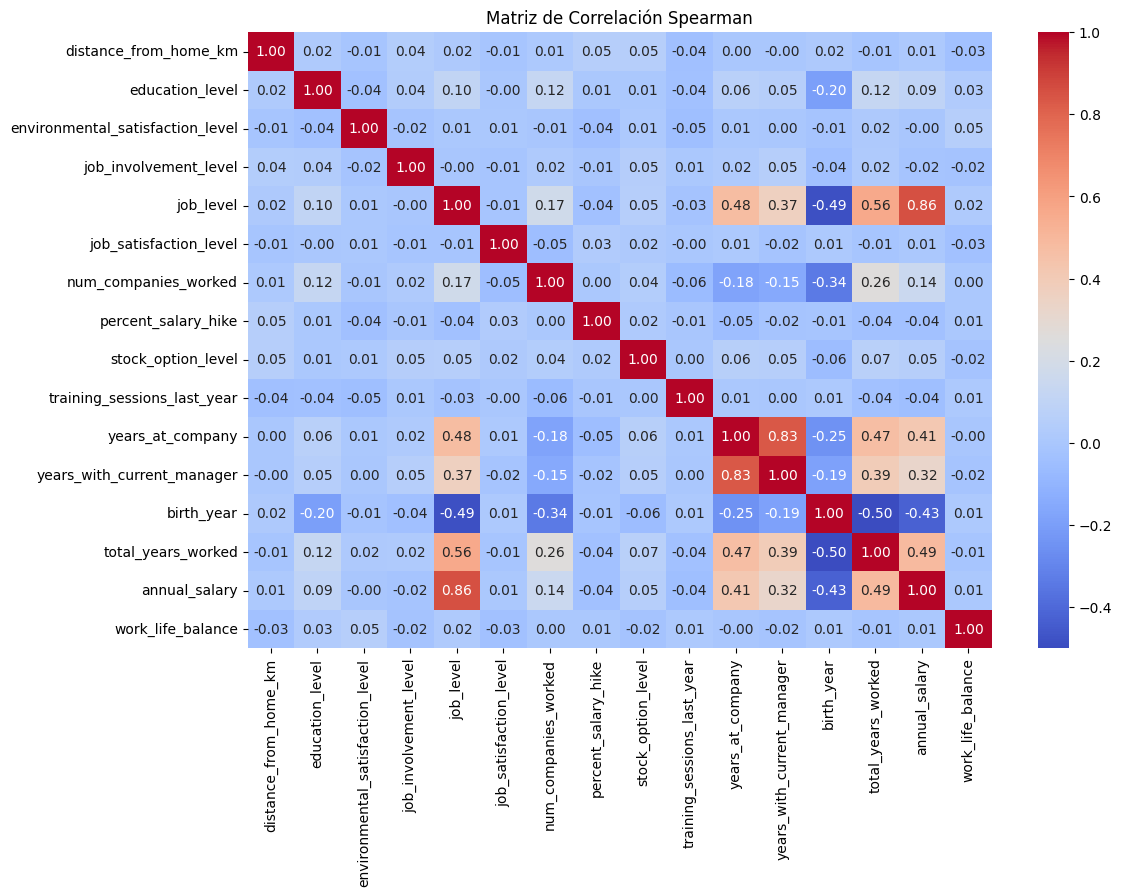

In [8]:
# Matriz de correlación Pearson

# Vamos a calcular la correlación de Pearson (que es la correlación estándar para variables numéricas) entre todas las variables numéricas del dataset.
# Filtro solo las columnas numéricas del DataFrame

df_numeric = df.select_dtypes(include=['number'])

# Calculamos la correlación de Spearman entre las variables numéricas
spearman_corr = df_numeric.corr(method='spearman')  

# Obtenemos la gráfica de la matriz de correlación de Spearman con un heatmap
plt.figure(figsize=(12, 8)) # establezco el tamaño del grafico.
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación Spearman')

# Spearman_corr = Es la tabla con los valores de correlación que calculamos en el paso anterior.
# annot=True: Muestra los valores de correlación dentro de cada celda del mapa de calor.
# cmap='coolwarm': Especifica los colores para el mapa de calor, donde los colores fríos representan valores bajos y los colores cálidos valores altos.
# fmt='.2f': Muestra los valores con 2 decimales.


### **Análisis de la Matriz de Correlación**

🔻 **Correlaciones más fuertes (+0.5 o más)**

1. "annual_salary" y "job_level"(0.88): Cuanto más alto es el nivel del puesto, mayor es el salario. Tiene lógica pues los ascensos llevan a mejores sueldos.
2. "years_at_company" y "years_with_current_manager" (0.76):  Si un empleado lleva más tiempo en la empresa, también ha estado con su gerente por más tiempo. Indica estabilidad en los equipos de trabajo.
3. "total_years_worked" y "years_at_company" (0.52): Los empleados que han trabajado más años en otras empresas también llevan más tiempo en la empresa actual.
4. "years_at_company" y "job_level" (0.53): Los empleados con más años en la empresa tienden a estar en niveles laborales más altos.

🔻 **Correlaciones negativas fuertes (-0.5 o menos)**

1. "birth_year" está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.56).** Esto sugiere que cuanto más joven es un empleado, menos años ha trabajado en otras empresas y tienen salarios más bajos. 
2. "job_level" y "birth_year" (-0.51): Los empleados más jóvenes suelen estar en niveles laborales más bajos.

🔻 **Correlaciones moderadas (0.2 a 0.5)**

1. "years_at_company" y "annual_salary" (0.47): Cuanto menos tiempo en la empresa, menor es el salario. La antigüedad es recompensada.
2. "years_at_company" y "birth_year" (-0.31): Cuanto menos años lleva en la empresa más joven es el empleado.
3. "num_companies_worked" tiene una relación positiva con "total_years_worked" (0.21), lo que sugiere que las personas con más experiencia laboral han trabajado en más número de empresas.
3. "education_level" tiene una correlación algo moderada con "total_years_worked" (0.12), pero una correlación negativa con "birth_year" (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.

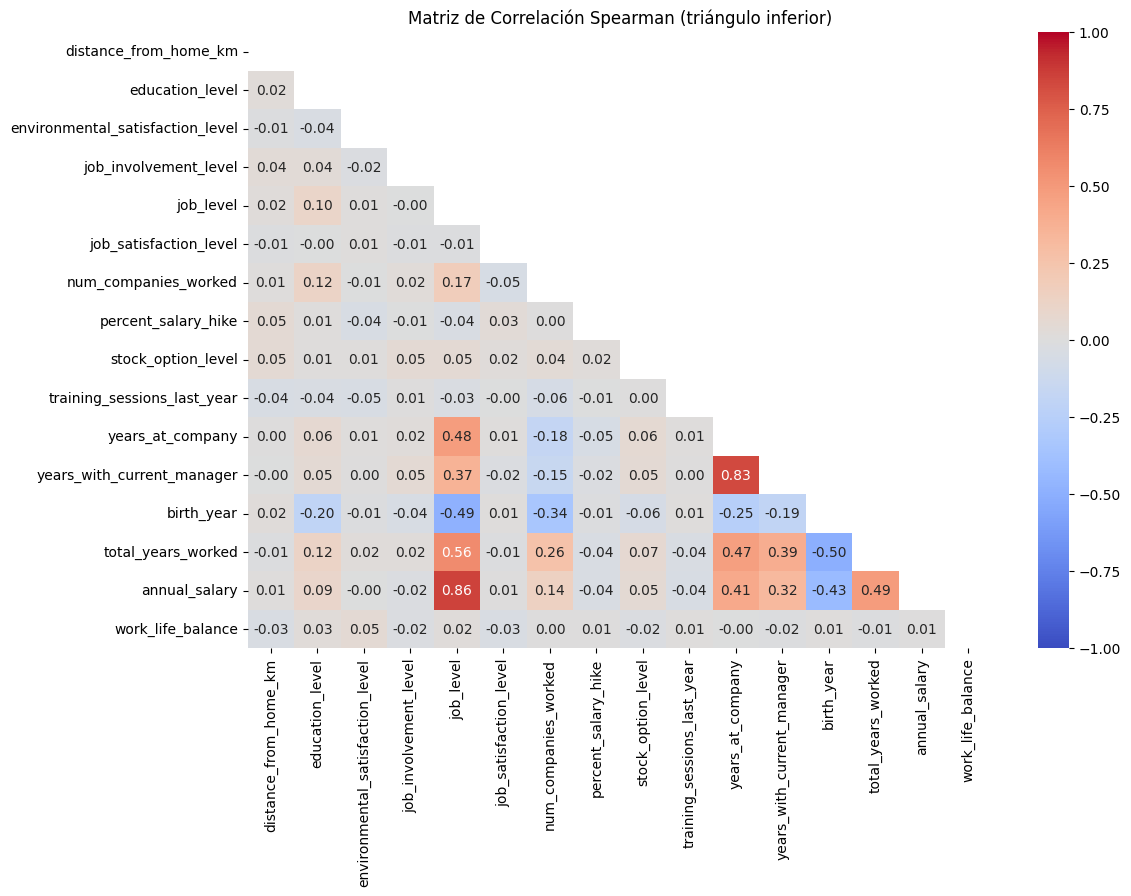

In [9]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica

# 1. Filtramos las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# 2. Calculamos la correlación de Spearman
spearman_corr = df_numeric.corr(method='spearman')

# 3. Creamos la máscara (triángulo superior)
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# 4. Dibujamos el heatmap con máscara
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            mask=mask,
            vmin=-1, vmax=1)
plt.title('Matriz de Correlación Spearman (triángulo inferior)')
plt.show()

### 🔍 Análisis de Resultados de Correlaciones (Pearson)

Aunque en un primer vistazo las correlaciones entre algunas variables numéricas y el employee_turnover no son muy fuertes, **sí se observan relaciones destacables entre variables clave**, especialmente con `job_level` y `years_at_company`.

### *Gráficos para Visualizar las Correlaciones de Job Level con otras Variables*

### Jerarquía del Puesto de Trabajo según Salario Anual

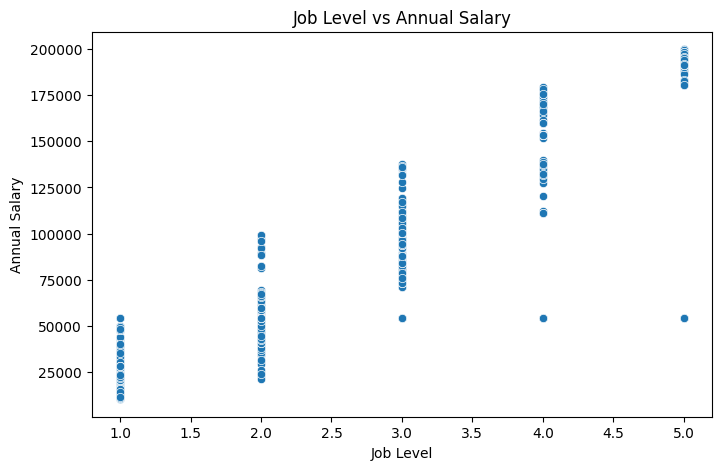

In [10]:
# Job Level y Annual Salary (correlación de 0.86)  # hacer con otro tipo de grafico

# Este gráfico de dispersión mostrará claramente cómo el nivel de trabajo se relaciona con el salario anual.


plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='annual_salary', data=df)
plt.title('Job Level vs Annual Salary')
plt.xlabel('Job Level')
plt.ylabel('Annual Salary');

Esta gráfica muestra que existe una relación clara y positiva entre el nivel de trabajo y el salario anual. A medida que aumenta el `job_level`, los empleados tienden a tener un mayor salario, lo cual es coherente con una estructura organizacional donde las posiciones más altas reciben mayor remuneración. Además, se observa cierta variabilidad salarial dentro de algunos niveles, especialmente en los intermedios, lo que podría estar relacionado con la antigüedad, bonificaciones o negociaciones individuales.


### Jerarquía del Puesto de Trabajo según Años Trabajados en Total

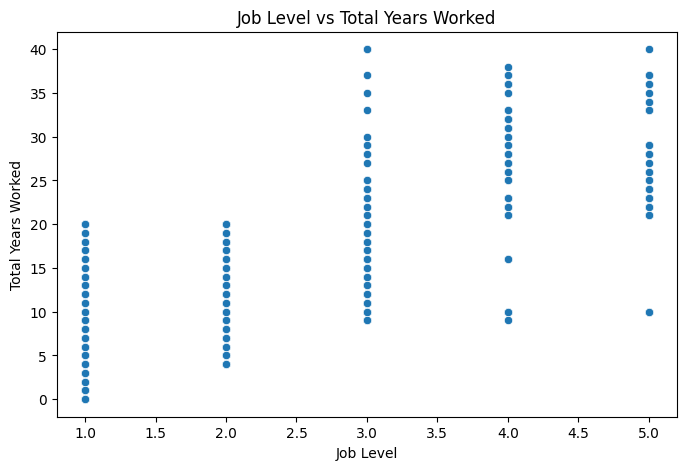

In [11]:
# Job Level y Total Years Worked (correlación de 0.56)
# Otro gráfico de dispersión para ver cómo el nivel de trabajo se asocia con los años trabajados en total.


plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='total_years_worked', data=df)
plt.title('Job Level vs Total Years Worked')
plt.xlabel('Job Level')
plt.ylabel('Total Years Worked');

La gráfica muestra una tendencia general positiva: a medida que los empleados han trabajado más años en total a lo largo de su carrera, tienden a ocupar niveles más altos en la empresa. Sin embargo, la dispersión dentro de cada nivel sugiere que el `job_level` no depende únicamente de la experiencia acumulada, sino que tambien pueden influir otros factores como las habilidades, la formacion o la trayectoria interna en la organizacion.


### Jerarquía del Puesto de Trabajo según Año de Nacimiento

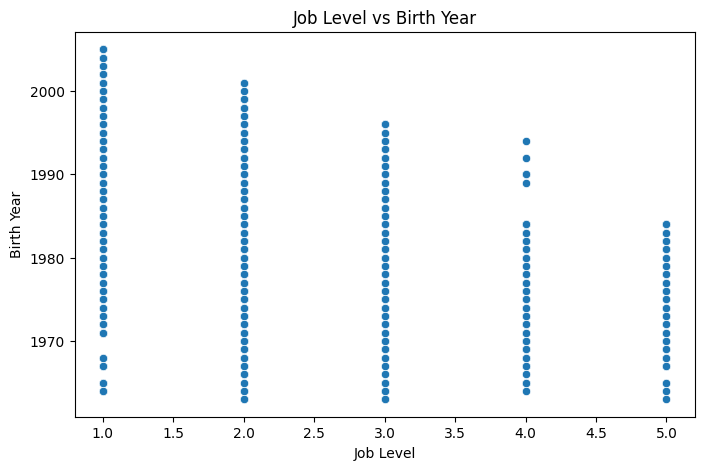

In [12]:
# Job Level y Birth Year (correlación de -0.49)
#En este caso, la correlación es negativa, por lo que espero que el gráfico muestre una tendencia descendente.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='birth_year', data=df)
plt.title('Job Level vs Birth Year')
plt.xlabel('Job Level')
plt.ylabel('Birth Year');

Esta gráfica muestra una relación inversa clara: los empleados con niveles de trabajo más altos suelen haber nacido en años anteriores, es decir, son mayores. Esto es coherente con lo que se espera en una organización donde la experiencia y los años de trayectoria influyen en la posición que se ocupa. No obstante, también se pueden observar casos puntuales de empleados jóvenes en niveles altos, lo cual podria deberse a promociones aceleradas o talentos excepcionales.


### Jerarquía del Puesto de Trabajo según Años con mismo Gerente

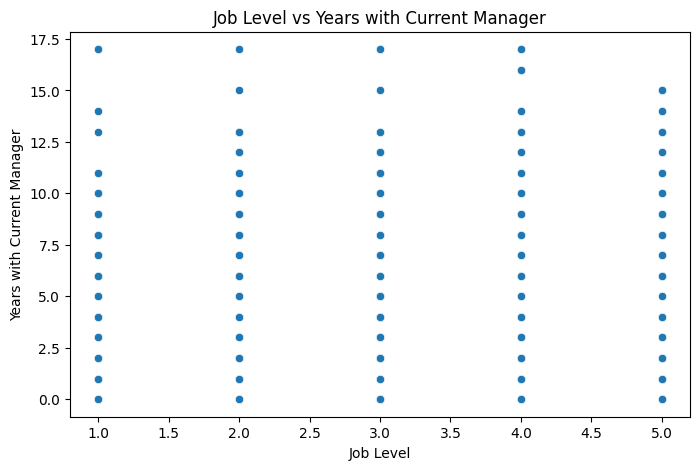

In [13]:
#  Job Level y Years with Current Manager (correlación de 0.37)
# Este gráfico ayuda a ver si hay una relación moderada entre los años con el gerente actual y el nivel de trabajo

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='years_with_current_manager', data=df)
plt.title('Job Level vs Years with Current Manager')
plt.xlabel('Job Level')
plt.ylabel('Years with Current Manager');

Se observa una leve tendencia ascendente: a medida que aumenta el nivel de trabajo, los empleados tienden a haber trabajado durante más tiempo con su manager actual. Aunque la relación no es muy fuerte, podría reflejar cierta estabilidad laboral asociada a puestos de mayor responsabilidad, o una mayor retención en equipos de trabajo consolidados. Sin embargo, la dispersión sugiere que esta no es una regla general y pueden existir múltiples trayectorias dentro de la organización.


### Jerarquía del Puesto de Trabajo según Años Trabajados en en la empresa

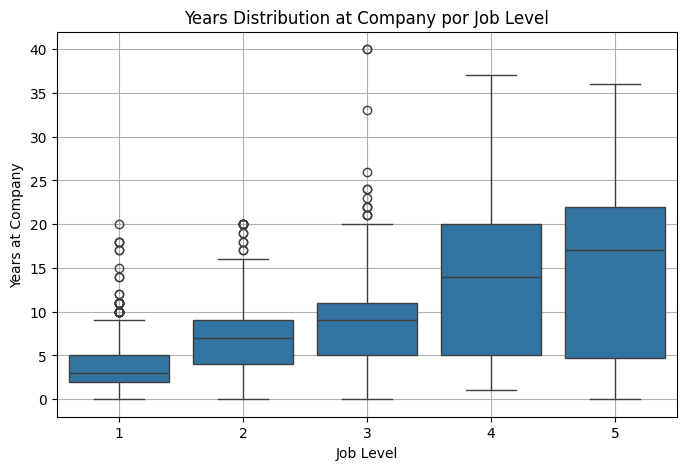

In [14]:
# Job Level y Years at Company (correlación de 0.48)
# Otro gráfico de dispersión para ver si los empleados con más antigüedad en la empresa tienen un nivel de trabajo más alto.

plt.figure(figsize=(8, 5))
sns.boxplot(x='job_level', y='years_at_company', data=df)
plt.title('Years Distribution at Company por Job Level')
plt.xlabel('Job Level')
plt.ylabel('Years at Company')
plt.grid(True) # para que saque las lineas de cuadricula

Este boxplot permite observar cómo varía la antigüedad en la empresa en función del nivel de trabajo. Se aprecia una tendencia clara: los empleados con `job_level` más alto suelen tener más años en la empresa. Además, la dispersión de los datos dentro de cada nivel indica que existen trayectorias diversas, con algunos empleados que alcanzan niveles superiores en menos tiempo, mientras que otros permanecen más años en un mismo nivel.


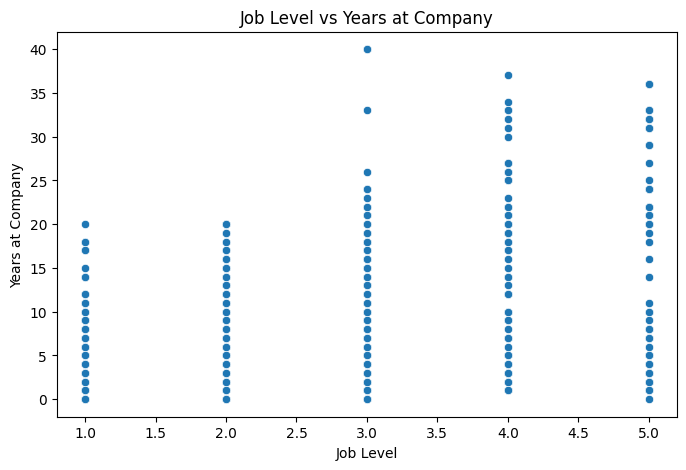

In [15]:
# Misma que anterior pero con scatterplot.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='years_at_company', data=df)
plt.title('Job Level vs Years at Company')
plt.xlabel('Job Level')
plt.ylabel('Years at Company');

#### 📉 Correlaciones con `years_at_company`

1. **Years at Company y Annual Salary (correlación: 0.41):**  
   Relación moderada. Empleados con más años en la empresa tienden a tener mejores salarios.

2. **Years at Company y Total Years Worked (correlación: 0.47):**  
   Correlación moderada positiva. La antigüedad en la empresa refleja también una carrera profesional más larga.

3. **Years at Company y Birth Year (correlación: -0.25):**  
   Correlación negativa débil. Empleados más jóvenes tienden a llevar menos tiempo en la empresa.

4. **Years at Company y Years with Current Manager (correlación: 0.76):**  
   Correlación fuerte positiva. Quienes han estado más tiempo en la empresa suelen tener relaciones laborales más largas con su manager actual.

### Años Trabajados en en la empresa y Salario Anual

Text(0, 0.5, 'Annual Salary')

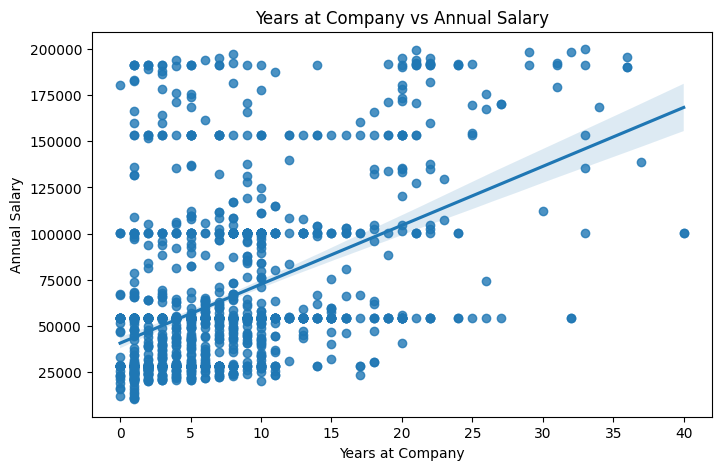

In [16]:
# Gráfico de dispersión entre Years at Company y Annual Salary

plt.figure(figsize=(8, 5))
sns.regplot(x='years_at_company', y='annual_salary', data=df)
plt.title('Years at Company vs Annual Salary')
plt.xlabel('Years at Company')
plt.ylabel('Annual Salary')

Esta gráfica incluye una línea de regresión que muestra una leve relación positiva entre la antigüedad en la empresa y el salario anual. Aunque existe una tendencia general de que los empleados con más años en la organización ganan más, la dispersión indica que esta relación no es determinante. Factores como el cargo, las promociones, la formación o acuerdos individuales pueden influir significativamente en la retribución económica.


### Años Trabajados en en la empresa y Años Trabajados en Total

Text(0, 0.5, 'Total Years Worked')

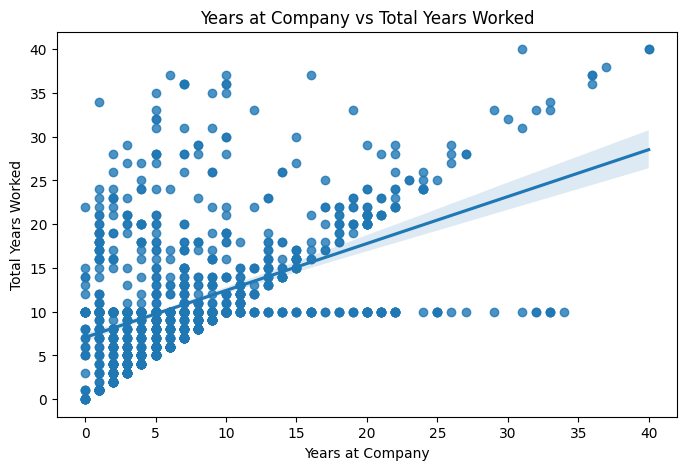

In [17]:
# Gráfico de dispersión entre Years at Company y Total Years Worked

plt.figure(figsize=(8, 5))
sns.regplot(x='years_at_company', y='total_years_worked', data=df)
plt.title('Years at Company vs Total Years Worked')
plt.xlabel('Years at Company')
plt.ylabel('Total Years Worked')


Este gráfico muestra una relación lógica y positiva: los empleados que llevan más tiempo en la empresa también suelen tener mayor experiencia laboral acumulada. La línea de regresión indica una tendencia clara, aunque existen casos de empleados cuya experiencia previa fuera de la empresa es significativa. También se identifican personas cuya carrera se ha desarrollado casi por completo dentro de esta organización.


### Comparación Años en la Empresa y Años de Nacimiento

Text(0.5, 0, 'Birth Year')

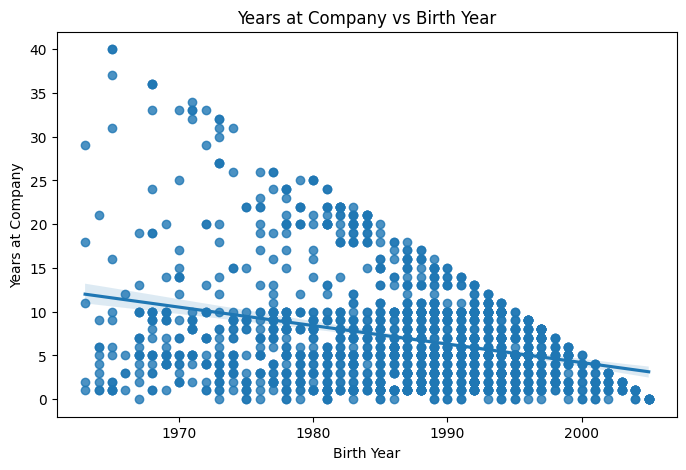

In [18]:
# Gráfico de dispersión entre Years at Company y Birth Year

plt.figure(figsize=(8, 5))
sns.regplot(y='years_at_company', x='birth_year', data=df)
plt.title('Years at Company vs Birth Year')
plt.ylabel('Years at Company')
plt.xlabel('Birth Year')

**Relación entre Birth Year y Years at Company**

Este gráfico revela una relación inversa entre el año de nacimiento y la antigüedad en la empresa: los empleados más jóvenes tienden a haber pasado menos tiempo en la organización. Aunque esta tendencia es esperada, también se observan excepciones, lo que sugiere que algunos empleados han tenido una trayectoria más larga en la empresa pese a ser relativamente jóvenes.


### Comparación Años en la Empresa y con mismo Gerente


Text(0, 0.5, 'Years with Current Manager')

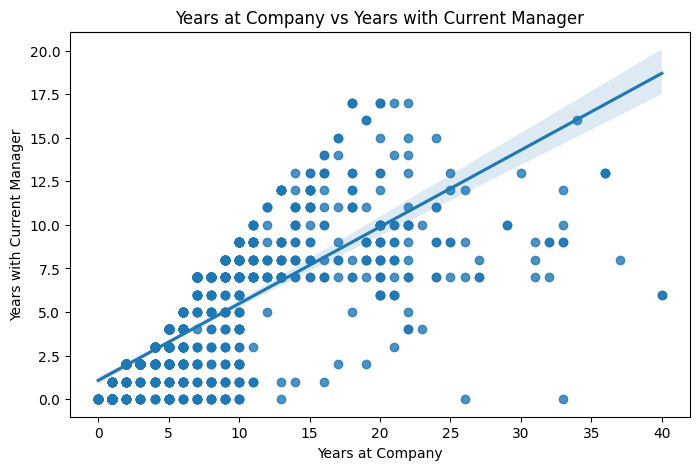

In [19]:
# Gráfico de dispersión entre Years at Company y Years with Current Manager

plt.figure(figsize=(8, 5))
sns.regplot(x='years_at_company', y='years_with_current_manager', data=df)
plt.title('Years at Company vs Years with Current Manager')
plt.xlabel('Years at Company')
plt.ylabel('Years with Current Manager')

Esta gráfica muestra una relación positiva clara: los empleados que llevan más tiempo en la empresa tienden a haber trabajado más años con su actual manager. Sin embargo, también se observan casos de personas con mucha antigüedad y poco tiempo con su actual superior, lo que podría indicar cambios recientes en la estructura organizativa. En general, esta relación puede dar pistas sobre la estabilidad en los equipos y la rotación de managers dentro de la empresa.


## 📊 Análisis Descriptivo Exploratorio de Variables Numéricas

Además de las correlaciones más significativas, hemos explorado visualmente otras variables que, si bien no presentan relaciones fuertes, pueden ofrecer insights interesantes sobre el comportamiento de los empleados y posibles patrones ocultos.


## Histograma histplot de una columna numérica ('birth_year')

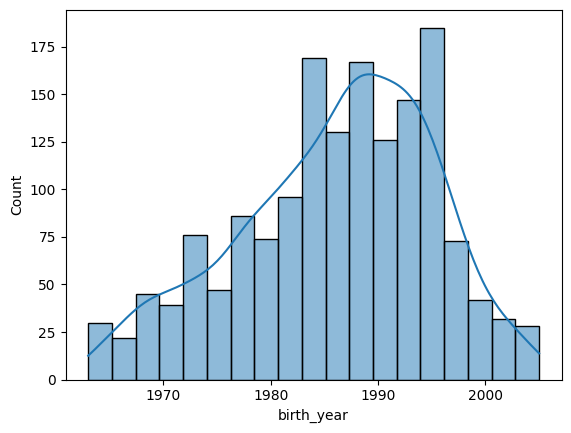

In [20]:
sns.histplot(df['birth_year'], kde=True); # cruzar con employe_turn_over y eliminar si es interesante

**Distribución del Año de Nacimiento del Personal**

El histograma muestra la distribución de los años de nacimiento del personal. Se observa que la mayoría de los empleados nació entre 1986-1996, lo que indica que la plantilla está compuesta principalmente por personas nacidas en esa franja temporal. La curva KDE refuerza esta tendencia y permite visualizar la forma general de la distribución, mostrando si existe concentración en determinados tramos de edad.


## Histplot para 'annual_salary'

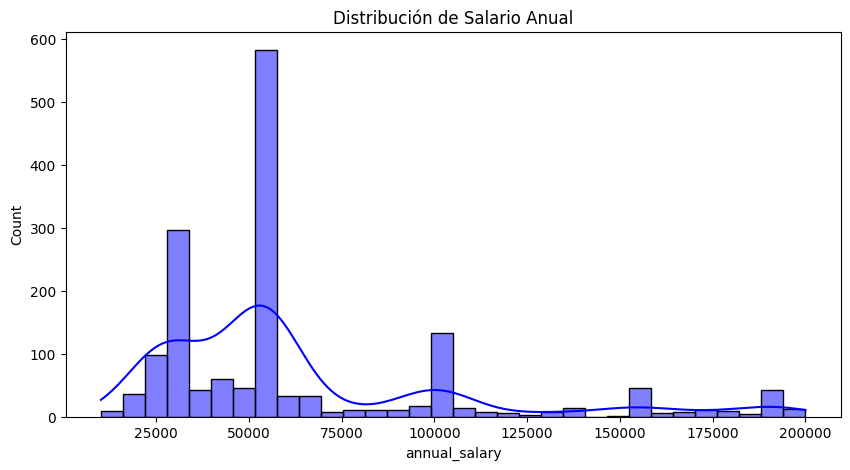

In [21]:
plt.figure(figsize=(10, 5)) # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.histplot(df['annual_salary'], kde=True, color='blue')  #kde=Tru para agregar la curva de densidad(representacion de la densidad)
plt.title('Distribución de Salario Anual'); 

# El histograma nos muestra cómo se distribuyen los salarios anuales. La curva KDE ayuda a entender mejor la forma de la distribución,
#  ya que suaviza la información del histograma. Esto es útil para identificar si los datos están sesgados, distribuidos normalmente 
# o si hay picos que indican algo interesante (como valores más concentrados en un rango de salarios).


**Distribución de Salario Anual (Histograma + KDE)**

La distribución de salarios en la empresa muestra una clara concentración en torno a los 55.000, siendo este el rango más frecuente. También se observa un segundo grupo más reducido de empleados con salarios alrededor de los 100.000, posiblemente asociados a puestos de mayor responsabilidad o seniority. La presencia de varios valores más altos, aunque poco frecuentes, genera una cola hacia la derecha, lo que indica una distribución asimétrica típica en organizaciones jerárquicas. Esta gráfica revela diferencias salariales significativas dentro del equipo.


## Histplot para 'years_at_company'  

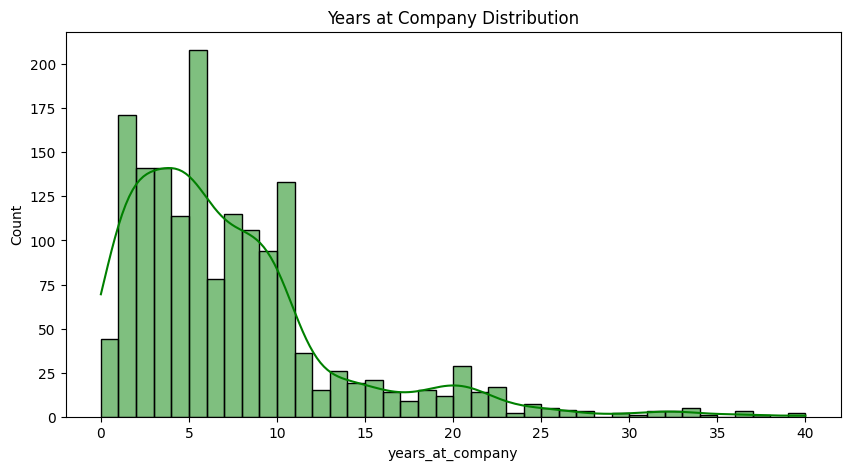

In [22]:
plt.figure(figsize=(10, 5))  # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.histplot(df['years_at_company'], kde=True, color='green')  #kde=Tru para agregar la curva de densidad(representacion de la densidad)
plt.title('Years at Company Distribution');


# Lo que este gráfico enseña es la distribución de la antigüedad de los empleados en la empresa. 
# Si la distribución está sesgada hacia un valor más bajo o más alto, eso podría indicar algo interesante sobre la estabilidad laboral en la empresa.

**Distribución de Años en la Empresa**

La mayor parte de los empleados lleva entre 2 y 10 años en la organización, con un pico claro en torno a los 5 años de antigüedad. Aunque en menor cantidad, también existen perfiles con trayectorias mucho más largas, superando incluso los 20 o 30 años. Esta distribución sugiere una plantilla mayoritariamente consolidada, con un nivel medio de permanencia elevado, pero también con casos de alta fidelización que aportan experiencia a largo plazo. La asimetría de la curva refuerza esta visión de antigüedad moderada con una base de empleados veteranos.


# 2. Variables Categóricas

## 2.1.- 🔍 Análisis Descriptivo

In [23]:
df_categ = df.select_dtypes(include = 'object')

In [24]:
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,male,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


## 2.2.- 📊 Análisis Diagnóstico Categóricas

### Rotación de Empleados según su Género

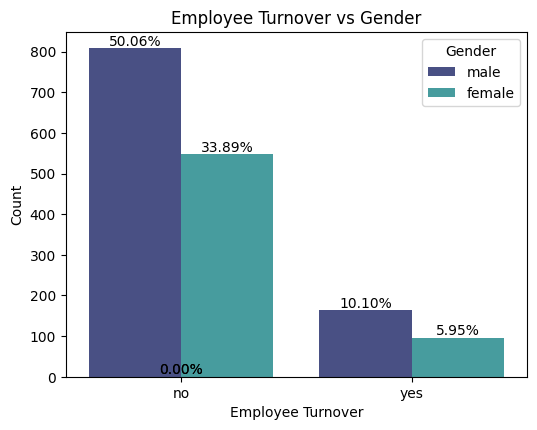

In [25]:
# Creamos un gráfico de barras para observar la distribución de las variables categóricas
plt.figure(figsize=(15, 8))
ax = plt.subplot(2, 3, 1)  # Asignamos el subplot a la variable ax
sns.countplot(x='employee_turnover', 
              hue='gender', 
              palette="mako",
              data=df_categ, 
              ax=ax) 
ax.set_title('Employee Turnover vs Gender')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")

# Añadimos etiquetas a los ejes
plt.legend(title='Gender')  # Añadimos leyenda para el hue
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos

# añadimos porcentaje a las barras
total = df_categ['employee_turnover'].value_counts()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total.sum():.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

Resultados:
- La rotación es más alta entre los hombres (10,10 %) que entre las mujeres (5,95 %). En general parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

- Si no supiéramos que el 60 % son hombres esto podría indicar que los hombres son más propensos a dejar la empresa. Además, es importante considerar otros factores como el tipo de trabajo o la antigüedad.

- La gráfica muestra que la rotación afecta a ambos géneros, pero con una ligera predominancia en mujeres. Aunque los hombres representan una mayor proporción de la plantilla, también son quienes más abandonan la empresa en términos absolutos. Para confirmar si existe una diferencia significativa en la rotación relativa (proporcionalmente), sería necesario analizar los porcentajes de salida por género.


### Rotación de Empleados según su Frecuencia de Viajes

En el siguiente gráfico de barras hemos relacionado las variables de rotación y frecuencia de viajes laborales para ver si existe una tendencia a rotar por frecuencia de viajes laborales.

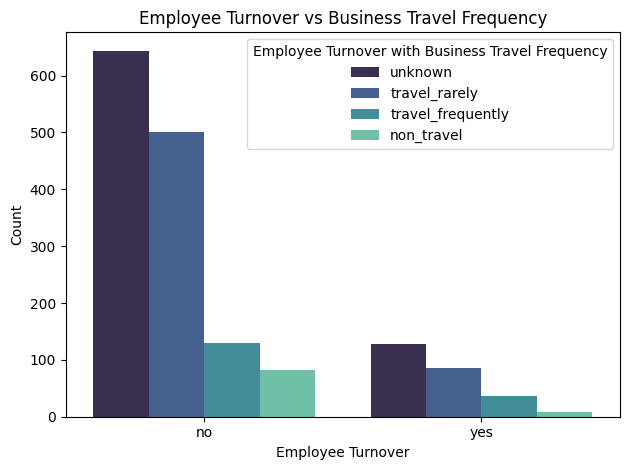

In [26]:
sns.countplot(x='employee_turnover',
              hue='business_travel_frequency',
              palette="mako",
              data=df_categ
              )
plt.title('Employee Turnover vs Business Travel Frequency')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.legend(title='Employee Turnover with Business Travel Frequency')  # Añadimos leyenda para el hue
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos

Resultados:
- Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

- Hay muchos valores "unknown", lo cual dificulta el análisis. Los datos no nos ofrecen una conclusión clara, pues tenemos un sesgo de 48 % datos desconocidos y sólo un 10 % viaja con frecuencia.

### Rotación de Empleados según su Estado Civil

En el siguiente gráfico de barras hemos relacionado las variables de rotación y estado civil para ver si las responsabilidades maritales afectan a la rotación.

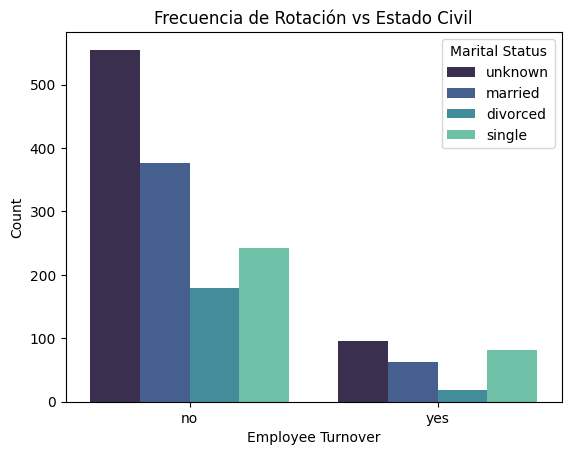

In [27]:
sns.countplot(x='employee_turnover',
              hue = 'marital_status',
              palette="mako",
              data=df_categ
              )
 # Añadimod nombre a hue 
plt.legend(title="Marital Status", loc='upper right')
# Cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Frecuencia de Rotación vs Estado Civil")
plt.show()

Resultados:
- En esta visualización destacamos que hay más casados que se quedan que solteros, es decir, en el grupo de los que abandonan sus puestos hay más solteros que casados o divorciados y, sin embargo, hay más casados que deciden no abandonar su estabilidad laboral.
- Hay muchos valores "unknown".
- En resumen, parece que los empleados solteros tienen más rotación que los casados/divorciados.

### Rotación de Empleados según las Horas Extras

Analizar la rotación de empleados en función de las horas extras es clave para entender los factores que influyen en la decisión de renunciar.

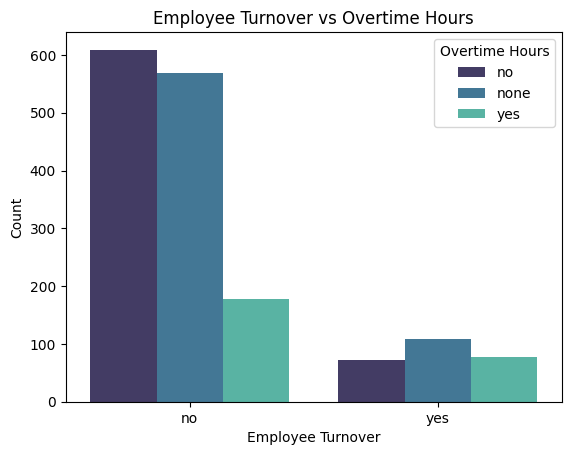

In [28]:
sns.countplot(x='employee_turnover',
              hue = 'overtime_hours',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Overtime Hours", loc='upper right')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Employee Turnover vs Overtime Hours")
plt.show()

Resultados:
- Este gráfico de barras nos muestra un dato importante en el análisis: los empleados que sí hacen horas extras tienden a abandonar la empresa.

    Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

    Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.
    
- Hay que valorar el sesgo de datos "none" nulos para llegar a unas conclusiones, puede que una variable externa esté afectando tanto a la variable dependiente (rotación) como a la independiente (horas extras), creando una falsa relación entre ellas.

### Rotación de Empleados en función del tipo de Jornada Laboral 

Analizar la rotación de empleados en función de la jornada laboral es crucial para comprender cómo el tiempo de trabajo impacta en la permanencia o salida de los empleados. Esta relación puede revelar factores clave que afectan la estabilidad laboral y la satisfacción de los trabajadores.

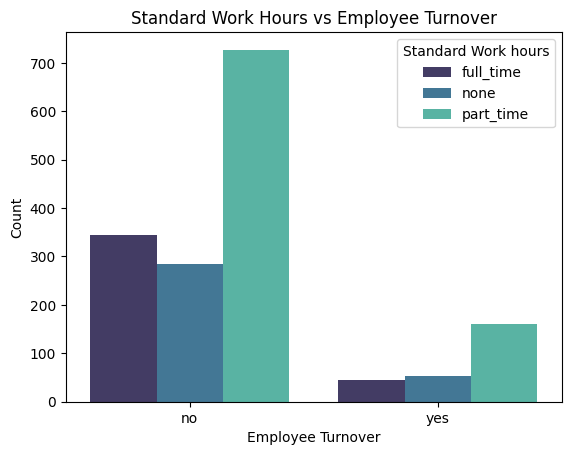

In [29]:
sns.countplot(x='employee_turnover',
              hue = 'standard_work_hours',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Standard Work hours", loc='upper right')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Standard Work Hours vs Employee Turnover")
plt.show()

Resultados:
- En esta gráfica no encontramos información relevante para nuestras conclusiones puesto que el 55 % de los empleados trabajan a jornada parcial.
- Puede haber una distribución de datos sesgada debido a las respuestas nulas.

### Rotación de Empleados en función del Trabajo en Remoto

En este gráfico de barras veremos si el trabajo en remoto (tele-trabajo) se relaciona directamente con la rotación de los empleados.

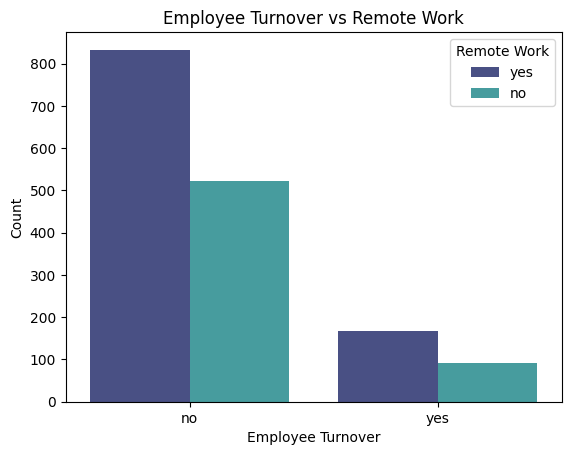

In [30]:
sns.countplot(x='employee_turnover',
              hue = 'remote_work',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Remote Work", loc='upper right')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Employee Turnover vs Remote Work")
plt.show()

Resultados:
- Más del 60 % de los trabajadores trabajan desde su casa o a distancia, es coherente y representativo que abandonen más empleados que trabajan en remoto.

### Rotación de Empleados según Edad

Text(0.5, 0, 'Birth Year')

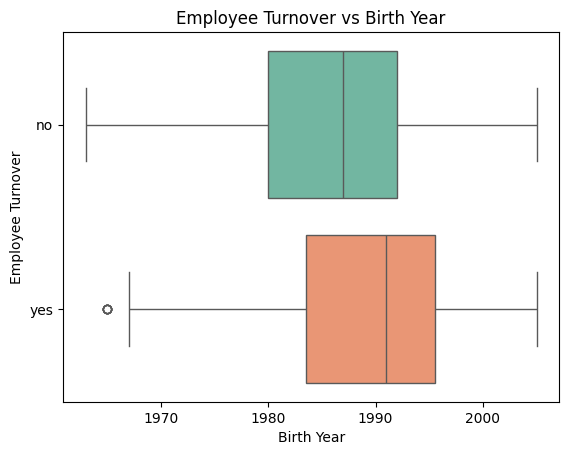

In [31]:
sns.boxplot(y='employee_turnover', x='birth_year', data=df, palette='Set2')  # palette= set" defino una paleta de colores suave y diferenciada por categorias.
plt.title('Employee Turnover vs Birth Year')
plt.ylabel('Employee Turnover')
plt.xlabel('Birth Year')

El boxplot revela que los empleados que han renunciado a la empresa tienden a ser más jóvenes (nacidos en años más recientes), mientras que aquellos que permanecen muestran una mayor variabilidad en la edad. Esto sugiere que los perfiles más jóvenes son más propensos a abandonar la organización, posiblemente en busca de nuevas oportunidades, mayor crecimiento profesional o mejores condiciones. 

La edad, por tanto, podría ser un factor relevante a considerar en la retención del talento.


### Rotación según Antigüedad en Empresa

Text(0.5, 0, 'Years at Company')

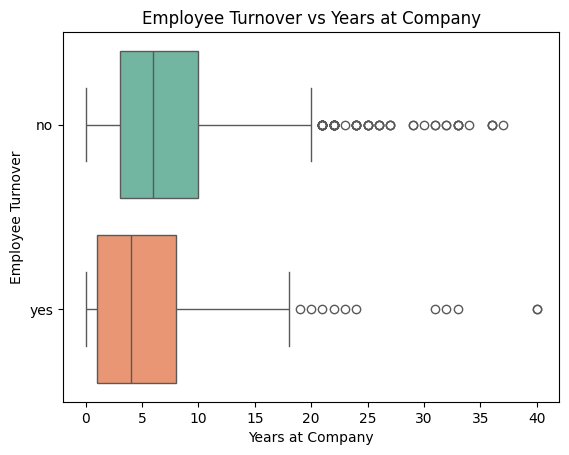

In [32]:
sns.boxplot(y='employee_turnover', x='years_at_company', data=df, palette='Set2')
plt.title('Employee Turnover vs Years at Company')
plt.ylabel('Employee Turnover')
plt.xlabel('Years at Company')

Este boxplot muestra una diferencia clara entre empleados que han renunciado y quienes permanecen en la empresa. Los que han dejado la organización tienden a tener menos años de antigüedad, mientras que quienes siguen en ella presentan trayectorias más largas. 

Esto sugiere que la antigüedad puede ser un factor relevante en la retención del personal: a mayor permanencia, menor probabilidad de rotación.


### Rotación según Salario Anual**

Text(0.5, 0, 'Annual Salary')

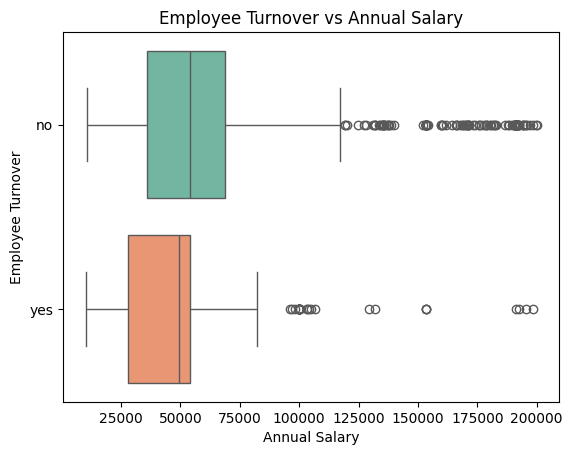

In [33]:
# Boxplot de 'employee_turnover' vs. 'annual_salary'

sns.boxplot(y='employee_turnover', x='annual_salary', data=df, palette = "Set2")
plt.title('Employee Turnover vs Annual Salary')
plt.ylabel('Employee Turnover')
plt.xlabel('Annual Salary')


El análisis muestra que los empleados que han renunciado presentan, en general, un salario anual más bajo que aquellos que permanecen en la empresa. Además, el rango salarial en el grupo que se queda es más amplio, con presencia de sueldos significativamente más altos. 

Esto sugiere que el salario podría ser un factor influyente en la rotación: los empleados con retribuciones más bajas podrían estar menos satisfechos o encontrar más fácilmente oportunidades externas más atractivas.


# Variables Categóricas Ordinales
## 🔍 3.1 Análisis Descriptivos

In [34]:
df.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [35]:
df_satisf = df[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [36]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


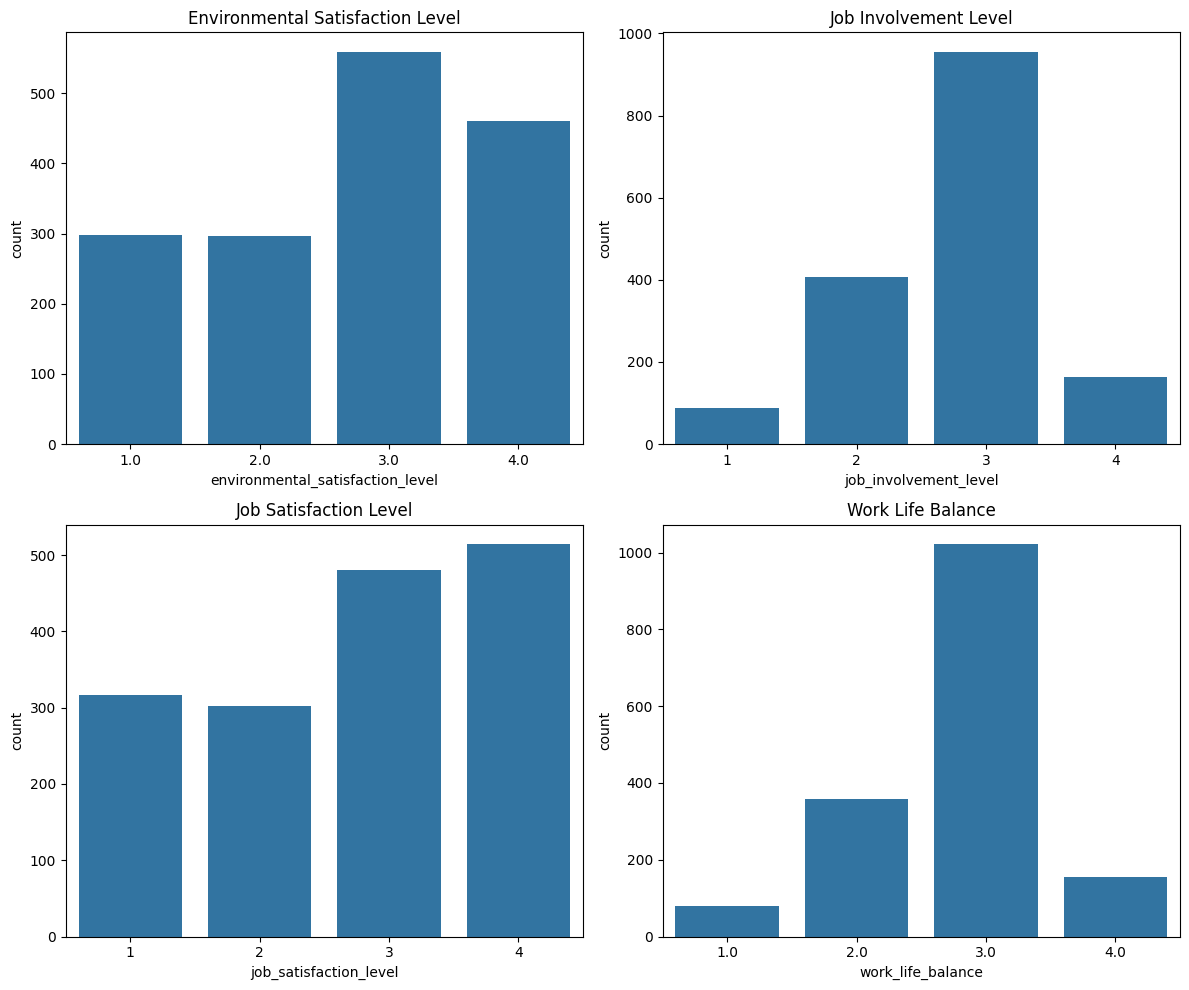

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Elegir una paleta de colores atractiva
palette = sns.color_palette("Set3")

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Environmental Satisfaction Level')

sns.countplot(data=df, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Job Involvement Level')

sns.countplot(data=df, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Job Satisfaction Level')

sns.countplot(data=df, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Work Life Balance')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusiones de las gráficas descriptivas:
- La satisfacción respecto al entorno de trabajo parece ser alta.
- El compromiso con el trabajo tiende a ser aceptable.
- La satisfacción con el trabajo sería alta.
- El equilibro percibido de la vida personal y profesional es aceptable también.

In [38]:
# Definimos una función para obtener los porcentajes de cada variable de la tabla
lista_categoricas = ["employee_turnover", "business_travel_frequency", "gender", "marital_status", "overtime_hours", "standard_work_hours", "remote_work", "job_level"]

In [39]:
# Definimos una función para obtener los porcentajes de cada variable de la tabla
def porcentajes(lista_categoricas):
    resultados = {}  # Diccionario para guardar los resultados
    for x in lista_categoricas:
        porcentaje = df[x].value_counts(normalize=True) * 100  # Aplicar a cada columna
        resultados[x] = round(porcentaje,2) # Guardamos el resultado en el diccionario
    
    return resultados  # Devolvemos el diccionario con todos los porcentajes

In [40]:
# Llamamos a la función
visualizacion = (porcentajes(lista_categoricas))

In [41]:
# Mejoramos la visualización del output anterior

for key, series in visualizacion.items():
    print(f"\n🔹 {key.replace('_', ' ').title()}:")
    for category, value in series.items():
        print(f"   - {str(category).capitalize()}: {value:.2f}%")


🔹 Employee Turnover:
   - No: 83.95%
   - Yes: 16.05%

🔹 Business Travel Frequency:
   - Unknown: 47.83%
   - Travel_rarely: 36.31%
   - Travel_frequently: 10.22%
   - Non_travel: 5.64%

🔹 Gender:
   - Male: 60.16%
   - Female: 39.84%

🔹 Marital Status:
   - Unknown: 40.33%
   - Married: 27.20%
   - Single: 20.14%
   - Divorced: 12.33%

🔹 Overtime Hours:
   - No: 42.26%
   - None: 41.88%
   - Yes: 15.86%

🔹 Standard Work Hours:
   - Part_time: 55.02%
   - Full_time: 24.04%
   - None: 20.94%

🔹 Remote Work:
   - Yes: 61.96%
   - No: 38.04%

🔹 Job Level:
   - 2: 36.99%
   - 1: 36.31%
   - 3: 14.99%
   - 4: 7.00%
   - 5: 4.71%


## 3.2.- 📊 Análisis Diagnóstico de Variables Categóricas Ordinales

In [42]:
# Tablas de frecuencia/proporciones de los diferentes niveles de satisficción del empleado cruzándola con las diferentes variables.
# Se usa normalize=True para mostrar los datos en porcentajes.

for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['employee_turnover'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
employee_turnover,,,,
no,13.754647,15.551425,29.925651,24.72119
yes,4.708798,2.850062,4.708798,3.77943


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
employee_turnover,,,,
no,3.531599,20.446097,50.681537,9.29368
yes,1.982652,4.708798,8.488228,0.86741


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
employee_turnover,,,,
no,15.303594,15.427509,25.092937,28.128872
yes,4.337051,3.283767,4.708798,3.717472


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
employee_turnover,,,,
no,3.469641,18.339529,54.213135,7.930607
yes,1.425031,3.903346,9.045849,1.672862


'\n'

Estas tablas nos muestran como los empleados que "no" han rotado ("employee_turnover") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los que "si" han rotado.

In [43]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['education_level'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
education_level,,,,
1,1.610905,2.230483,4.151177,3.159851
2,3.593556,3.841388,6.133829,5.885998
3,6.753408,6.319703,14.250310,11.152416
4,5.947955,5.018587,9.355638,7.249071
5,0.557621,0.991326,0.743494,1.053284


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
education_level,,,,
1,0.867410,3.035936,6.629492,0.619579
2,0.929368,5.390335,11.152416,1.982652
3,1.982652,9.107807,22.924411,4.460967
4,1.548947,6.939281,16.542751,2.540273
5,0.185874,0.681537,1.920694,0.557621


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
education_level,,,,
1,2.044610,1.796778,3.531599,3.779430
2,3.593556,3.655514,5.638166,6.567534
3,8.054523,8.364312,10.842627,11.214374
4,5.142503,4.584882,8.674102,9.169765
5,0.805452,0.309789,1.115242,1.115242


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
education_level,,,,
1,0.371747,2.726146,6.939281,1.115242
2,1.053284,4.213135,12.267658,1.920694
3,2.044610,9.417596,23.729864,3.283767
4,1.301115,5.452292,17.719950,3.097893
5,0.123916,0.433705,2.602230,0.185874


'\n'

Estas tablas nos muestran como los empleados que tienen un nivel educativo mayor ("education_level") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles educativos.

In [44]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['gender'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
gender,,,,
female,7.311029,7.372986,14.002478,11.152416
male,11.152416,11.028501,20.631970,17.348203


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
gender,,,,
female,2.044610,10.594796,23.358116,3.841388
male,3.469641,14.560099,35.811648,6.319703


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
gender,,,,
female,8.054523,8.054523,12.267658,11.462206
male,11.586121,10.656753,17.534077,20.384139


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
gender,,,,
female,1.920694,8.736059,25.340768,3.841388
male,2.973978,13.506815,37.918216,5.762082


'\n'

Estas tablas nos muestran como la variable de género influye en los niveles de satisfación:
-En general las mujeres muestran un mayor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados de sexo masculino

In [45]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['job_level'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, '....................')

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
job_level,,,,
1,6.691450,6.939281,12.701363,9.975217
2,6.381660,7.249071,12.267658,11.090458
3,2.912020,2.540273,5.947955,3.593556
4,1.548947,0.867410,2.416357,2.168525
5,0.929368,0.805452,1.301115,1.672862


'....................'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
job_level,,,,
1,2.168525,9.107807,21.189591,3.841388
2,2.230483,8.736059,22.057001,3.965304
3,0.619579,4.399009,8.798017,1.177200
4,0.185874,1.796778,4.089219,0.929368
5,0.309789,1.115242,3.035936,0.247831


'....................'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
job_level,,,,
1,7.001239,7.001239,10.842627,11.462206
2,6.939281,6.629492,11.090458,12.329616
3,3.469641,2.602230,4.399009,4.522924
4,1.425031,1.486989,1.796778,2.292441
5,0.805452,0.991326,1.672862,1.239157


'....................'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
job_level,,,,
1,2.106568,8.302354,22.800496,3.097893
2,1.672862,7.806691,23.605948,3.903346
3,0.743494,3.221809,9.355638,1.672862
4,0.309789,1.796778,4.337051,0.557621
5,0.061958,1.115242,3.159851,0.371747


'....................'

Estas tablas nos muestran como la variable de nivel del nivel jerárquico del puesto del empleado influye en los niveles de satisfación:
-En general se puede observar que a mayor nivel gerarquico del puesto del empleado, presentan un menor grado de nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles jerarquicos. 

In [46]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['overtime_hours'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "..........................")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
overtime_hours,,,,
no,8.116481,8.054523,14.436183,11.648079
none,7.744734,7.372986,14.807931,11.957869
yes,2.602230,2.973978,5.390335,4.894672


'..........................'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
overtime_hours,,,,
no,2.354399,11.028501,24.535316,4.337051
none,2.044610,10.099133,25.464684,4.275093
yes,1.115242,4.027261,9.169765,1.548947


'..........................'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
overtime_hours,,,,
no,7.682776,8.240397,13.258984,13.073110
none,9.169765,7.249071,11.400248,14.064436
yes,2.788104,3.221809,5.142503,4.708798


'..........................'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
overtime_hours,,,,
no,2.168525,8.612144,27.075589,4.399009
none,1.920694,10.408922,25.588600,3.965304
yes,0.805452,3.221809,10.594796,1.239157


'..........................'

Estas tablas nos muestran como si el empleado trabaja horas extras (Yes/No) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan horas extras presentan menor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no hacen horas extras. 

In [47]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['standard_work_hours'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "......................")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
standard_work_hours,,,,
full_time,4.708798,4.275093,8.178439,6.877323
none,4.213135,4.089219,6.381660,6.257745
part_time,9.541512,10.037175,20.074349,15.365551


'......................'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
standard_work_hours,,,,
full_time,1.548947,6.505576,13.692689,2.292441
none,1.177200,4.646840,12.701363,2.416357
part_time,2.788104,14.002478,32.775713,5.452292


'......................'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
standard_work_hours,,,,
full_time,4.956629,4.151177,6.753408,8.178439
none,4.584882,3.159851,6.691450,6.505576
part_time,10.099133,11.400248,16.356877,17.162330


'......................'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
standard_work_hours,,,,
full_time,1.115242,5.142503,15.675341,2.106568
none,0.805452,4.956629,13.073110,2.106568
part_time,2.973978,12.143742,34.510533,5.390335


'......................'

Estas tablas nos muestran como la clasificación de jornada (Full Time/Part Time) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan part time presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que trabajan full time. 

In [48]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['years_at_company'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "..................................")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
years_at_company,,,,
0,0.371747,0.743494,0.743494,0.867410
1,2.044610,1.920694,3.655514,2.973978
2,1.920694,1.363073,2.973978,2.478315
3,2.416357,1.239157,2.478315,2.602230
4,1.425031,1.115242,2.292441,2.230483
5,2.540273,1.982652,4.708798,3.655514
6,0.495663,1.239157,1.920694,1.177200
7,0.805452,1.672862,2.168525,2.478315
8,0.991326,1.177200,2.912020,1.486989


'..................................'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
years_at_company,,,,
0,0.185874,0.557621,1.858736,0.123916
1,0.681537,3.655514,5.266419,0.991326
2,0.495663,2.230483,5.390335,0.619579
3,0.371747,1.920694,5.576208,0.867410
4,0.557621,1.796778,3.965304,0.743494
5,0.619579,2.788104,8.240397,1.239157
6,0.185874,1.239157,2.850062,0.557621
7,0.805452,1.548947,3.531599,1.239157
8,0.309789,1.053284,4.089219,1.115242


'..................................'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
years_at_company,,,,
0,0.743494,0.309789,0.991326,0.681537
1,1.920694,2.416357,2.973978,3.283767
2,1.301115,1.425031,2.973978,3.035936
3,1.982652,1.548947,2.788104,2.416357
4,1.796778,1.301115,1.982652,1.982652
5,2.478315,2.416357,4.151177,3.841388
6,0.805452,0.867410,0.929368,2.230483
7,1.734820,0.929368,1.796778,2.664188
8,0.867410,1.796778,2.788104,1.115242


'..................................'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
years_at_company,,,,
0,0.185874,0.557621,1.734820,0.247831
1,0.619579,2.106568,6.753408,1.115242
2,0.495663,1.796778,5.824040,0.619579
3,0.557621,1.486989,5.700124,0.991326
4,0.309789,2.168525,4.275093,0.309789
5,0.867410,2.416357,7.868649,1.734820
6,0.247831,1.610905,2.664188,0.309789
7,0.185874,1.734820,4.399009,0.805452
8,0.123916,1.301115,4.213135,0.929368


'..................................'

Estas tablas nos muestran como los años en la compañia influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados tienen menos años en la empresa presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen más años trabajando en la empresa. 

Los datos parecen representar la distribución de los niveles de implicación laboral (Job Involvement Level) según los años en la empresa (Years at Company).
Filas (Índice: years_at_company)
Representan el número de años que un empleado ha trabajado en la empresa.
Hay valores desde 0 años hasta más de 40 años, aunque algunos valores están ausentes (por ejemplo, no hay 28, 35, 38, 39).
Columnas (job_involvement_level: 1, 2, 3, 4)
Representan diferentes niveles de implicación laboral:
1 = Muy baja implicación
2 = Baja implicación
3 = Alta implicación
4 = Muy alta implicación
Valores en el DataFrame
Son probablemente proporciones o conteos de empleados con un cierto nivel de implicación en cada grupo de años en la empresa.

In [49]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['birth_year'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "........................................")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
birth_year,,,,
1963,0.123916,0.000000,0.185874,0.000000
1964,0.123916,0.123916,0.371747,0.000000
1965,0.123916,0.123916,0.123916,0.557621
1966,0.061958,0.061958,0.061958,0.123916
1967,0.185874,0.061958,0.371747,0.433705
1968,0.185874,0.185874,0.681537,0.495663
1969,0.247831,0.123916,0.371747,0.495663
1970,0.309789,0.123916,0.371747,0.433705
1971,0.185874,0.123916,0.495663,0.371747


'........................................'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
birth_year,,,,
1963,0.061958,0.061958,0.123916,0.061958
1964,0.000000,0.309789,0.247831,0.061958
1965,0.061958,0.247831,0.619579,0.000000
1966,0.000000,0.061958,0.123916,0.123916
1967,0.061958,0.061958,0.805452,0.123916
1968,0.061958,0.371747,0.867410,0.247831
1969,0.000000,0.061958,1.115242,0.061958
1970,0.000000,0.309789,0.681537,0.247831
1971,0.061958,0.495663,0.557621,0.061958


'........................................'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
birth_year,,,,
1963,0.185874,0.000000,0.000000,0.123916
1964,0.123916,0.000000,0.123916,0.371747
1965,0.123916,0.247831,0.309789,0.247831
1966,0.000000,0.000000,0.185874,0.123916
1967,0.433705,0.185874,0.185874,0.247831
1968,0.309789,0.433705,0.247831,0.557621
1969,0.309789,0.123916,0.495663,0.309789
1970,0.247831,0.123916,0.433705,0.433705
1971,0.185874,0.247831,0.309789,0.433705


'........................................'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
birth_year,,,,
1963,0.061958,0.000000,0.123916,0.123916
1964,0.061958,0.309789,0.247831,0.000000
1965,0.000000,0.495663,0.433705,0.000000
1966,0.061958,0.123916,0.123916,0.000000
1967,0.061958,0.371747,0.557621,0.061958
1968,0.000000,0.185874,1.177200,0.185874
1969,0.123916,0.371747,0.619579,0.123916
1970,0.061958,0.309789,0.681537,0.185874
1971,0.123916,0.309789,0.619579,0.123916


'........................................'

Estas tablas nos muestran como la edad influye en los niveles de satisfación:
-En general se puede observar que mientras los empleados tienen más edad presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados más jóvenes.

In [50]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['remote_work'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, ".............................................")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
remote_work,,,,
no,6.939281,6.877323,13.630731,10.594796
yes,11.524164,11.524164,21.003717,17.905824


'.............................................'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
remote_work,,,,
no,1.672862,10.037175,22.428748,3.903346
yes,3.841388,15.117720,36.741016,6.257745


'.............................................'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
remote_work,,,,
no,7.930607,7.311029,11.586121,11.214374
yes,11.710037,11.400248,18.215613,20.631970


'.............................................'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
remote_work,,,,
no,1.858736,9.107807,23.729864,3.345725
yes,3.035936,13.135068,39.529120,6.257745


'.............................................'

Estas tablas nos muestran como si el pleado trabaja en remoto (yes/no) remoto influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan en remoto, presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no trabajan de manera remota. 

In [51]:
# Definir rangos de salario (puedes ajustarlos según necesidad)
bins = [0, 30000, 60000, 90000, 120000, 200000]  # Límites de los grupos
labels = ['0-30e', '30e-60e', '60e-90e', '90e-120e', '120e+']  # Etiquetas para los grupos

# Crear una nueva columna categórica en df
df['salary_range'] = pd.cut(df['annual_salary'], bins=bins, labels=labels)

# Crear tablas de frecuencias/proporciones para cada variable de satisfacción
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['salary_range'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencias/proporciones para {col}:\n", tc, "............................................")

'Tabla de frecuencias/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
salary_range,,,,
0-30e,4.832714,4.460967,9.541512,7.001239
30e-60e,8.488228,9.727385,15.241636,14.064436
60e-90e,1.053284,0.867410,1.982652,1.486989
90e-120e,2.044610,1.796778,4.708798,2.540273
120e+,2.044610,1.548947,3.159851,3.407683


'............................................'

'Tabla de frecuencias/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
salary_range,,,,
0-30e,1.425031,6.753408,14.807931,2.850062
30e-60e,2.726146,11.152416,28.438662,5.204461
60e-90e,0.371747,1.363073,3.097893,0.557621
90e-120e,0.495663,3.221809,6.691450,0.681537
120e+,0.495663,2.664188,6.133829,0.867410


'............................................'

'Tabla de frecuencias/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
salary_range,,,,
0-30e,4.460967,5.700124,7.496902,8.178439
30e-60e,9.789343,8.054523,14.436183,15.241636
60e-90e,1.239157,1.177200,1.425031,1.548947
90e-120e,2.416357,1.610905,3.159851,3.903346
120e+,1.734820,2.168525,3.283767,2.973978


'............................................'

'Tabla de frecuencias/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
salary_range,,,,
0-30e,1.486989,5.700124,16.232962,2.416357
30e-60e,2.168525,10.842627,29.801735,4.708798
60e-90e,0.247831,0.991326,3.531599,0.619579
90e-120e,0.495663,2.230483,7.187113,1.177200
120e+,0.495663,2.478315,6.505576,0.681537


'............................................'

Estas tablas nos muestran como el salario anual influye en los niveles de satisfación del empleado:
-En general se puede observar que a mayor salario, los emmpleados presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen un salario anual menor. 

# ❇️ Conclusiones Finales

**Rotación de Empleados:**

La rotación de empleados está influenciada por factores como el género, las horas extras, el trabajo remoto, la frecuencia de viajes laborales y el estado civil.

- Horas extras: Los empleados que trabajan horas extras tienen una mayor probabilidad de abandonar la empresa, lo que sugiere que la sobrecarga laboral puede ser un factor clave.

- Frecuencia de viajes laborales: Los empleados que viajan con frecuencia también muestran una mayor tendencia a rotar, posiblemente debido al impacto en el equilibrio entre vida personal y laboral.

- Estado civil: Los empleados solteros tienen una mayor rotación en comparación con los casados o divorciados, lo que podría estar relacionado con diferentes prioridades o estabilidad personal.


**Satisfacción Laboral:**

Los niveles de satisfacción laboral, ambiental, involucramiento en el trabajo y equilibrio entre vida personal y laboral están estrechamente relacionados con la retención de empleados.

- Trabajo remoto y tiempo parcial: 

Los empleados que trabajan de forma remota o a tiempo parcial reportan mayores niveles de satisfacción, lo que sugiere que estas políticas pueden ser efectivas para mejorar la retención. 

Los empleados que trabajan de forma remota o a tiempo parcial tienden a reportar mayores niveles de satisfacción en comparación con los que trabajan a tiempo completo o de manera presencial.

- Bajo equilibrio vida-trabajo: Los empleados con menor satisfacción en el equilibrio entre vida personal y laboral tienen una mayor probabilidad de abandono, destacando la importancia de políticas que promuevan este equilibrio.


**Factores Demográficos:**

- Edad y antigüedad: Los empleados más jóvenes y con menos años en la empresa tienden a mostrar mayores niveles de abandono, a pesar de reportar altos niveles de satisfacción. Esto podría deberse a la búsqueda de nuevas oportunidades o falta de compromiso a largo plazo.

- Género: Las mujeres, en general, reportan mayores niveles de satisfacción en comparación con los hombres, aunque no necesariamente tienden a no querer dejar la empresa.


**Jerarquía y Salario:**

- A mayor nivel jerárquico y salario, los empleados tienden a reportar mayores niveles de satisfacción. 

Sin embargo, los niveles jerárquicos más altos también pueden estar asociados con mayores niveles de estrés y menor equilibrio entre vida personal y laboral, lo que puede aumentar su riesgo de rotación..

- Salarios bajos: Los empleados con salarios más bajos tienen una mayor probabilidad de rotar, lo que sugiere que la compensación económica sigue siendo un factor determinante en la retención.
